# Миша, привет! 👋

Меня зовут Артем Пиляй. Я буду проверять твой проект. Со мной можно на «ты».
 
В тетрадке ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «🔁#️⃣ Ревьюер».  
Твои проекты станут еще круче, если ты воспользуешься комментариями в дальнейших проектах.
 
Повторная проверка пройдет быстрее если ты не будешь перемещать, изменять и удалять мои комментарии. Еще ускорить повторную проверку можно если ты будешь писать о внесенных изменениях в синих ячейках Markdown, заготовку я тебе приготовил ниже. 😉

<div class="alert alert-danger">

<b>🔁#️⃣ Ревьюер: ✋</b> Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.

</div>

<div class="alert alert-warning">

<b>🔁#️⃣ Ревьюер: 👉</b> Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.

</div>

<div class="alert alert-success">

<b>🔁#️⃣ Ревьюер: 👍</b> Такой комментарий в начале проекта означает, что работа принята. В основной части работы комментарии такого цвета говорят о том, что было сделано что-то качественное и правильное. 😉

</div>

<div class="alert alert-info">

<b>Студент: </b> Такой комментарий можно будет быстро найти.

</div>

---

<blockquote> Привет! Так я буду отмечать свои вопросы. </blockquote>

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Проект еще не начал проверять, но уже тебе могу сказать Красавчик. Здорово, что задаешь вопросы.

</div>

<a id="cell_100"></a>
<div class="alert alert-danger">

<b>🔁1️⃣ Ревьюер: ✋</b> Миша, у тебя хороший проект. Здорово, что используешь визуализацию. Но ты выполнил не все разделы обязательные к исполнению. Доделывай и высылай проект.
       
Жду новую версию проекта. 🙂

    
</div>

<div class="alert alert-info">

<b>Студент: </b> Привет! Спасибо за ревью.

</div>

<div class="alert alert-danger">

<b>🔁2️⃣ Ревьюер: ✋</b> Пожалуйста. И тебе спасибо за работу. Осталось заменить уровень дохода более точными значениями и проект можно принимать. Если возникнут проблемы с заполнением, то я подскажу как. По ходу проекта оставил комментарии.
       

Жду новую версию проекта. 🙂

    
</div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns
# sns.set_context('notebook')
# sns.set_style()

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid')

# Обновление требуется для доступа к sns.histplot()
# %pip install seaborn==0.11.2

from pymystem3 import Mystem
m = Mystem()

Note: you may need to restart the kernel to use updated packages.


In [2]:
# init_df - датафрейм в исходном виде
init_df = pd.read_csv('/datasets/data.csv')

# df - датафрейм для преобразования
df = pd.read_csv('/datasets/data.csv')

*Значения колонок*

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

In [3]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


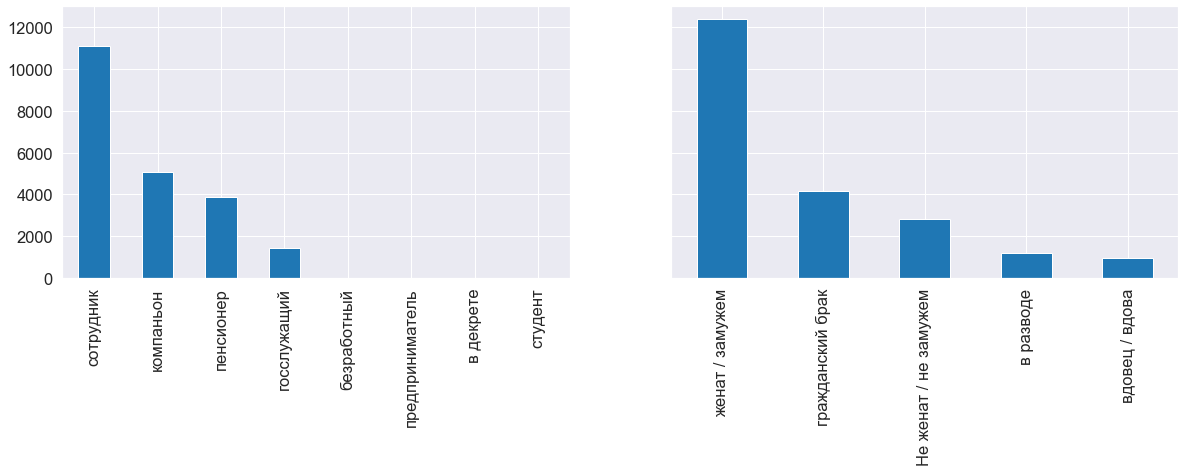

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

df['income_type'].value_counts().plot.bar(ax=ax1)
df['family_status'].value_counts().plot.bar(ax=ax2)

plt.show()

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Тоже смело могу похвалить. Как я люблю говорить, один график вместо тысячи слов. Очень наглядно.

</div>

- При первом знакомстве с данными видны проблемы в колонке `days_employed`: некоторые значения отрицательные
- В колонках `days_employed` и `total_income` есть пропуски, при этом их количество одинаково в обеих колонках. Обе колонки содержат данные вещественного типа.
- В таблице представлено 8 разных типов занятасти заемщиков, основной вклад приходится на `сотрудников`, `компаньонов`, `пенсионеров` и `госслужащих`. Более половины клиентов женаты/замужем. _Это предварительные оценки, которые могут измениться после обработки пропусков и дубликатов **(проверить)**._

**Вывод**

В данных есть проблемы, их природу необходимо исследовать прежде чем приступать к анализу

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Хорошо.

</div>

## Шаг 2. Предобработка данных

После предварительного ознакомления с данными кажется, что прежде всего внимание нужно уделить отрицательным значениям в колонке `days_employed`.

Чем можно объяснить их появление?

In [6]:
# Таблица с отрицательным трудовым стажем
neg_days_df = df[df['days_employed'] <= 0]

# Таблица с положительным трудовым стажем
pos_days_df = df[df['days_employed'] > 0]

neg_days_df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [7]:
print(f'Доля отрицательных значений days_employed среди всех значений days_employed: {neg_days_df.shape[0] / df.shape[0]:.0%}')

Доля отрицательных значений days_employed среди всех значений days_employed: 74%


Посмотрим на них внимательнее.

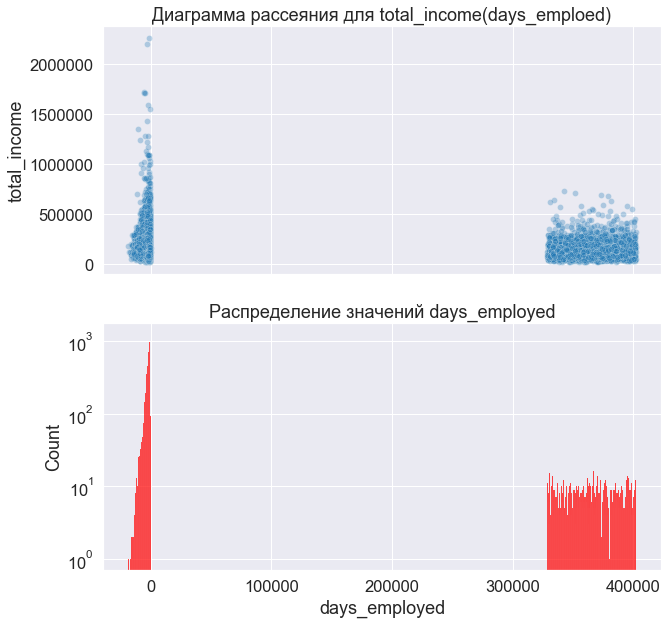

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

sns.scatterplot(data=df, x='days_employed', y='total_income', ax=ax1, alpha=.3)
ax1.set_title('Диаграмма рассеяния для total_income(days_emploed)')

h = sns.histplot(data=df, x='days_employed', ax=ax2, color='red')
h.set_yscale("log")
ax2.set_title('Распределение значений days_employed')

plt.show()

Видно, что данные разбиты на две группы, сильно отстоящие друг от друга. На верхней панели видно, что разброс значений ежемесячного дохода в группе слева заметно больше.

На нижней панели видно, что распределения значений `days_employed` в этих группах сильно отличаются. Построю эти распределения на отдельных графиках и переведу дни в года.

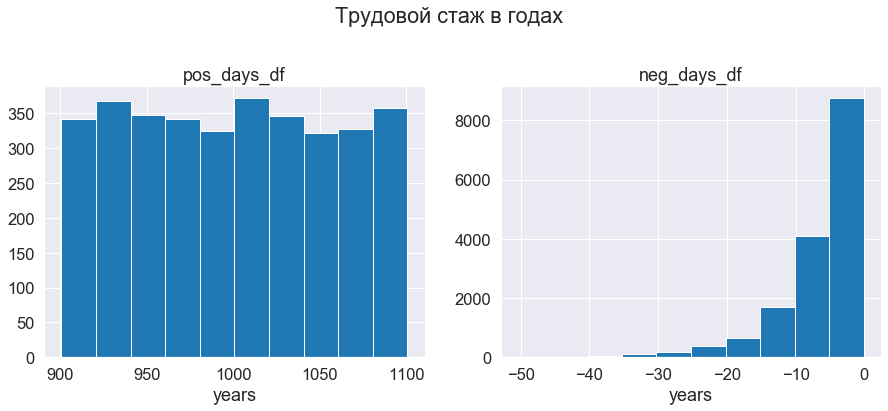

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(pos_days_df['days_employed'] / 365)
ax1.set_xlabel('years')
ax1.set_title('pos_days_df')

# ax1.set_yscale('log')

ax2.hist(neg_days_df['days_employed'] / 365)
ax2.set_xlabel('years')
ax2.set_title('neg_days_df')

fig.suptitle('Трудовой стаж в годах', y=1.1)

plt.show()

Трудовой стаж в 1000 лет $-$ можно смело повышать пенсионный возраст в стране.

Из гистограм выше можно сделать такие выводы:

- Положительные значения в колонке `days_employed` (левая панель) не вызывают доверия по двум причинам. Во-первых, они слишком большие (порядка $10^3$). Во-вторых, можно выдвинуть гипотезу о том, что эти данные порождены равномерным распределением (т. е. клиенты берут кредит одинаково часто независимо от своего трудового стажа).
- Отрицательные значения `days_employed` лежат в диапазоне от 0 до ~35. Если взять их модуль, то получится, что с увеличением трудового стажа клиенты реже обращаются за кредитом. Такое поведение кажется адекватным: люди с б**о**льшим трудовым стажем с б**о**льшей вероятностью пользуются собственными накоплениями вместо кредита.

Выше было показано, что доля отрицательных значений `days_employed` среди всех значений составляет 74%. Можно предположить, что отрицательными они стали по ошибке (и что это единственная проблема с ними). Тогда при анализе следует пользоваться их абсолютными занчениями. С положительными занчениями `days_employed` ситуация сложнее: трудно сформулировать простую гипотезу о происхождении проблем с ними.

<code style="background:LightCyan;color:black">Важная деталь: информация о трудовом стаже не требуется ни для одного из итоговых вопросов, перечисленных в чек-листе.</code>

По этой причине я здесь я ограничусь тем, что создам колонку `days_employed_abs`, в которую запишу абсолютные значения из колонки `days_employed` таблицы `neg_days_df`. Недостающие значения отмечу как NaN, чтобы с колонкой можно было производить арифметические операции. На значения в колонке `days_employed_abs` можно будет ориентироваться, если вдруг потребуется обращаться к информации о трудовом стаже клиентов.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Отличный вывод. Здорово, что оцениваешь данные в контексте поставленной задачи. Замечу, что данные могли быть взяты из разных баз данных и соответственно они могли считаться в разных единицах времени.

P.S. «Трудовой стаж в 1000 лет −− можно смело повышать пенсионный возраст в стране.» 😂



</div>

In [10]:
# Создаю колонку 'days_employed_abs'
df = df.merge(np.abs(neg_days_df['days_employed']), how='left', left_index=True, right_index=True, suffixes=['', '_abs'])

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,8437.673028
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,4024.803754
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,5623.422610
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,4124.747207
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,4529.316663
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,NaN
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,2113.346888
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,3112.481705


<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Преобразовать в абсолютные величины можно так: 
    
```py
df['column_2'] = df['column'].apply(abs)
# или
df['column_2'] = df['column'].abs()
```
Зачем усложнять?

</div>

<div class="alert alert-info">

<b>Студент: </b> Понял, принял.

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Хорошо.

</div>

### Обработка пропусков

In [11]:
df.isna().sum()

children                0
days_employed        2174
dob_years               0
education               0
education_id            0
family_status           0
family_status_id        0
gender                  0
income_type             0
debt                    0
total_income         2174
purpose                 0
days_employed_abs    5619
dtype: int64

Пропуски содержатся в колонках `days_employed`, `days_employed_abs` и `total_income`. Колонка `days_employed_abs` создана мной для удобства и в исходной таблице отсутствовала.

Посмотрим на данные, содержащие пропуски в `days_employed` и `total_income`:

In [12]:
nan_days_df = df[df['days_employed'].isna()]
nan_incom_df = df[df['total_income'].isna()]

In [13]:
nan_days_df.equals(nan_incom_df)

True

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children             21525 non-null int64
days_employed        19351 non-null float64
dob_years            21525 non-null int64
education            21525 non-null object
education_id         21525 non-null int64
family_status        21525 non-null object
family_status_id     21525 non-null int64
gender               21525 non-null object
income_type          21525 non-null object
debt                 21525 non-null int64
total_income         19351 non-null float64
purpose              21525 non-null object
days_employed_abs    15906 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


Датафреймы nan_days_df и nan_incom_df идентичны, значит пропуски в колонках `days_employed` и `total_income` совпадают не только по количеству, но и по строкам.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Верно.

</div>

In [15]:
print(f'Доля пропущенных значений в колонках days_employed и total_income составляет {nan_days_df.shape[0] / df.shape[0]:.0%} от общего количество записей в таблице.')

Доля пропущенных значений в колонках days_employed и total_income составляет 10% от общего количество записей в таблице.


Кроме того, подозрительные значения присутствуют в колонке `dob_years`:

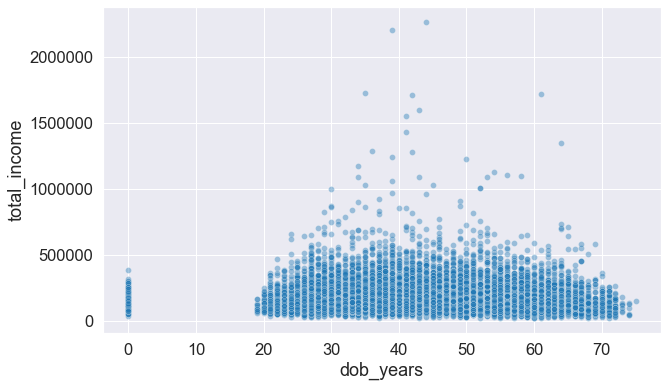

In [16]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='dob_years', y='total_income', ax=ax, alpha=.4)

plt.show()

In [17]:
init_df[init_df['dob_years'] < 10]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье
20462,0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,331741.271455,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,-108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


Младенцы не должны работать и (тем более) брать кредиты, поэтому нулевые значения в этой колонке я заменю на NaN (чтобы указать на их недостоверность в явном виде, но иметь возможность производить арифметические операции над колонкой). Если в колонке оставить нули, то возникнут проблемы при категоризации клиентов по возрастным группам.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Допустим. В разрезе заданных вопросов это не столь важно.

</div>

In [18]:
df['dob_years'] = df['dob_years'].where(df['dob_years'] != 0, np.NaN)

# Проверка
df[df['dob_years'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs
99,0,346541.618895,NaN,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль,NaN
149,0,-2664.273168,NaN,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем,2664.273168
270,3,-1872.663186,NaN,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью,1872.663186
578,0,397856.565013,NaN,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости,NaN
1040,0,-1158.029561,NaN,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль,1158.029561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,NaN,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье,NaN
20462,0,338734.868540,NaN,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья,NaN
20577,0,331741.271455,NaN,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость,NaN
21179,2,-108.967042,NaN,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости,108.967042


Подозрительные значения присутствуют в колонке `children`:

In [19]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [20]:
df['children'][df['children'] == -1] = int(0)
df['children'][df['children'] == 20] = int(2)

/Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Чтобы Python не ругался: 
    
```py
df.loc[df['children'] == -1] = 1
df.loc[df['children'] == 20] = 2
```

</div>

In [21]:
# Проверка
df['children'].value_counts()

0    14196
1     4818
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [22]:
# Заменю слишком большие и слишком маленькие значения на NaN
# df['children'] = df['children'].where((df['children'] >= 0) & (df['children'] < 10), np.NaN)

<div class="alert alert-warning">

<b>🔁1️⃣ Ревьюер: 👉</b> Не соглашусь с тобой. Не важно кем ты будешь работать DA или DS, важно понимать причину возникновения аномалий и чем ее можно заменить. В данном случае, можно выдвинуть вполне реалистичные гипотезы и заменить на числа.

</div>

<div class="alert alert-info">

<b>Студент: </b> Хорошо. Допустим, что отрицательные значения в колонке появились из-за опечатки с минусом. Я заменил их на нули. Про клиенты с 20 можно подумать, что ноль был приписан случайно и заменить их на "2".

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Можно и так. Но если опечатка с минусом, значит минус лишний, а единицу можно оставить. 😉

</div>

<div class="alert alert-info">

<b>Студент: </b> Пропуски в колонки с доходом заменю на медианные значения. Их меньше 10% и такой подход не должен сместить статитики. Трудовой стаж нам неинтересен, поэтому там заменю пропуски на нули.

</div>

<a id="cell_22_2"></a>
<div class="alert alert-danger">

<b>🔁2️⃣ Ревьюер: ✋</b> Чтобы данные были более точными, пропущенные значения в «уровне дохода» лучше заполнить в связке с типом занятости, поскольку этот столбец нам понадобится в дальнейшем исследовании. Согласись, вряд ли доход студента и предпринимателя одинаковый или возраст студента и пенсионера. 
    
</div>

<div class="alert alert-info">

<b>🔁2️⃣ Студент: </b> Справедливо, сейчас сделаю.

</div>

In [23]:
# Сначала найду медианные значения в каждой группе

income_median_df = df.pivot_table(index='income_type', values='total_income', aggfunc=['median', 'count'])

income_median_df.columns = ['income_median', 'income_count']

income_median_df

,income_median,income_count
income_type,,
безработный,131339.751676,2
в декрете,53829.130729,1
госслужащий,150447.935283,1312
компаньон,172357.950966,4577
пенсионер,118514.486412,3443
предприниматель,499163.144947,1
сотрудник,142594.396847,10014
студент,98201.625314,1


In [24]:
df['total_income'].isna().sum()

2174

In [25]:
# Назначаю замену пропусков медианными значениями в каждой группе по профессии
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

# Проверка: случайные значения в строках обновленного датафрейма, на месте которых изначально были NaN
df[init_df['total_income'].isna()].drop_duplicates(subset=['income_type'])[['income_type', 'total_income']]

,income_type,total_income
12,пенсионер,118514.486412
26,госслужащий,150447.935283
65,компаньон,172357.950966
82,сотрудник,142594.396847
5936,предприниматель,499163.144947


Значения совпадают со статистикой в `income_median_df`

In [26]:
df['total_income'].isna().sum()

0

<div class="alert alert-info">

<b>🔁2️⃣ Студент: </b> Пропуски заменены с учетом профессии

</div>

In [27]:
# Нехилая медиана для России (если это данные по России и если они в рублях)
df['total_income'].median()

142594.39684740017

In [28]:
# df['total_income'] = df['total_income'].fillna(df['total_income'].median())
df['days_employed'] = df['days_employed'].fillna(0)
df['dob_years'] = df['dob_years'].fillna(0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children             21525 non-null int64
days_employed        21525 non-null float64
dob_years            21525 non-null float64
education            21525 non-null object
education_id         21525 non-null int64
family_status        21525 non-null object
family_status_id     21525 non-null int64
gender               21525 non-null object
income_type          21525 non-null object
debt                 21525 non-null int64
total_income         21525 non-null float64
purpose              21525 non-null object
days_employed_abs    15906 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.1+ MB


#### Подозрительные значения в категориальных данных

In [30]:
def value_count_df(df, colnames):
    """
    Выводит подсчет вхождений значений в колонках `colnames` датафрейма `df`

    Args:
        df (pd.DataFrame): датафрейма
        colnames (array_like): список колонок
    """    

    # Уникальные значения в этих колонках
    for col in colnames:
        print(col)
        print(df[col].value_counts())
        print()

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Спасибо, порадовал тем, что правильно прокомментировал функцию.

</div>

In [31]:
# Колонки с категориальными данными
categorial_cols = ['education', 'family_status', 'gender', 'income_type', 'purpose']

value_count_df(df, categorial_cols)

education
среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

family_status
женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

gender
F      14236
M       7288
XNA        1
Name: gender, dtype: int64

income_type
сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

p

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> И здорово, что автоматизировал процесс.

</div>

Проблемы с представлением текста наблюдаются в колонках `education` (разный регистр) и `purpose` (разные формулировки и орфографические ошибки). Некорректное значение присутствует в колонке `gender`: 'XNA' (впрочем, только для одного клиента). Обработаю его:

In [32]:
df['gender'] = df['gender'].where(df['gender'] != 'XNA', np.NaN)

<div class="alert alert-warning">

<b>🔁1️⃣ Ревьюер: 👉</b> Одно значение из более двадцати тысяч точно можно удалить.

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Можно так:
        
```py
df = df.loc[df['gender'] != 'XNA']
```

</div>

In [33]:
# Проверка

df['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

**Вывод**

- В колонке `days_employed` присутствуют отрицательные и положительные значения. Положительные значения вызывают подозрения - они слишком большие и имеют неправдоподобное распределение. Отрицательные значения, взятые по модулю, имеют правдоподобное значение. На основе последних создана колонка `days_employed_abs`, к которой можно обращаться за информацией о трудовом стаже для части клиентов. При этом важно помнить, что мои предположения о природе ошибок в данных могут оказаться некорректными.

- Исходная таблица содержала пропуски в явном виде (NaN) в колонках `days_employed` и `total_income`. При этом для каждого клиента информация либо присутствует сразу в обеих колонках, либо отсутствует (нет клиентов, для которых указан `days_employed`, но не указан `total_income` и наоборот). Значения пропущены для 10% данных. Вряд ли пропуски содержались в данных изначально: информация о трудовом стаже и ежемесячном доходе клиента необходима для оформления кредита. Скорее всего, ошибки имеют технический характер.

- В колонке `dob_years` присутствуют нулевые значения. Они могут привести к проблемам при категоризации клиентов по возрастным группам, а также дают артефакты при построении распределений. По этой пречине я заменил их на NaN: тип данных в колонке изменится на float64, но пропуски будут отмечены явным образом. Аналогично были обработаны выбросы в колонке `children`&

- Некорректное значение присутствует в колонке `gender` для одного из клиентов. Это значение я заменил на NaN (хотя, наверно, можно было и на None)

- В колонках с категориальными данными `education`, `family_status`, `income_type`, `purpose` пропуски отстутствуют, но есть проблемы с форматированием текста. Разберусь с ними в следующих разделах.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> С выводами у тебя все отлично!

</div>

<a id="cell_24"></a>
<div class="alert alert-danger">

<b>🔁1️⃣ Ревьюер: ✋</b> В данном шаге была поставлена задача заменить пропущенные значения, то есть заполнить их числами, но, к сожалению, ты этого не сделал. Пожалуйста заполни пропущенные значения. Я могу тебе подсказать как это сделать, но вижу, что у тебя есть опыт в программировании, поэтому думаю, что ты справишься сам. 😉

</div>

<div class="alert alert-info">

<b>Студент: </b> Заменил ошибки в колонке `gender` и пропуски в `total_income`, `days_employed`, `dob_years`.

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Хорошо. Оставил комментарий выше про более точное заполнение столбца с уровнем дохода.

</div>

### Замена типа данных

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children             21525 non-null int64
days_employed        21525 non-null float64
dob_years            21525 non-null float64
education            21525 non-null object
education_id         21525 non-null int64
family_status        21525 non-null object
family_status_id     21525 non-null int64
gender               21524 non-null object
income_type          21525 non-null object
debt                 21525 non-null int64
total_income         21525 non-null float64
purpose              21525 non-null object
days_employed_abs    15906 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.1+ MB


**Вывод**

Здесь, вероятно, предполагается, что я поменяю тип данных в колонках `days_employed` и `total_income` с float64 на int64, потому что значения в них содержатся с избыточной точностью. И сделаю это, например, при помощи метода astype(). Не вижу смысла: во-первых, меня не пугает избыточная точность в этих колонках, а во-вторых, придется заменять NaN на целочисленные значения (зачем?). Готов передумать, если меня кто-нибудь переубедит.

<a id="cell_25"></a>
<div class="alert alert-danger">

<b>🔁1️⃣ Ревьюер: ✋</b> Тебя и не нужно переубеждать. Заказчик ставит задачу, ты либо берешься за работу, либо отказываешься от нее. В данном случае заказчик четко написал в техзадании «замените вещественный тип данных на целочисленный». Кроме того, в предыдущем шаге заказчик просил «определите и заполните пропущенные значения», поэтому проблемы с `NaN` здесь нет.



</div>

<div class="alert alert-info">

<b>Студент: </b> Ладно, понял. Сделаю ниже. Колонку `days_employed_abs` оставлю, потому что она содержит информацию об изначальных пропусках.

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Спасибо.

</div>

In [35]:
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)
df['dob_years'] = df['dob_years'].astype(int)
# df['days_employed_abs'] = df['days_employed_abs'].astype(int)

# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children             21525 non-null int64
days_employed        21525 non-null int64
dob_years            21525 non-null int64
education            21525 non-null object
education_id         21525 non-null int64
family_status        21525 non-null object
family_status_id     21525 non-null int64
gender               21524 non-null object
income_type          21525 non-null object
debt                 21525 non-null int64
total_income         21525 non-null int64
purpose              21525 non-null object
days_employed_abs    15906 non-null float64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.1+ MB


### Обработка дубликатов

Для начала исправлю проблемы с разными регистрами:

In [36]:
df['education'] = df['education'].str.lower()

Дубликаты в данных действительно присутствуют:

In [37]:
df.duplicated().sum()

71

In [38]:
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs
2849,0,0,41,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для семьи,NaN
3290,0,0,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу,NaN
4182,1,0,34,высшее,0,гражданский брак,1,F,сотрудник,0,142594,свадьба,NaN
4851,0,0,60,среднее,1,гражданский брак,1,F,пенсионер,0,118514,свадьба,NaN
5557,0,0,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,0,64,среднее,1,женат / замужем,0,F,пенсионер,0,118514,дополнительное образование,NaN
21032,0,0,60,среднее,1,женат / замужем,0,F,пенсионер,0,118514,заняться образованием,NaN
21132,0,0,47,среднее,1,женат / замужем,0,F,сотрудник,0,142594,ремонт жилью,NaN
21281,1,0,30,высшее,0,женат / замужем,0,F,сотрудник,0,142594,покупка коммерческой недвижимости,NaN


In [39]:
dublicates_total = df.duplicated(keep=False).sum()

print(f'Всего дублирующихся строчек: {dublicates_total}')

Всего дублирующихся строчек: 137


In [40]:
print(f'Доля всех дубликатов составляет {dublicates_total / df.shape[0]:.2%} от всех данных.')

Доля всех дубликатов составляет 0.64% от всех данных.


Дубликатов среди данных отностиельно немного. Возможно, они появились из-за человеческого фактора. Избавлюсь от них:

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Согласен.

</div>

In [41]:
df = df.drop_duplicates().reset_index()

df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs
0,0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,8437.673028
1,1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754
2,2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,5623.422610
3,3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,4124.747207
4,4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21520,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4529.316663
21450,21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,NaN
21451,21522,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,2113.346888
21452,21523,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705


**Вывод**

- В исходных данных присутствуют дубликаты (в том числе неявные).

- Доля дубликатов от всех данных невелика (<1%). Возможно, они обусловлены человеческим фактором.

- От части неявных дубликатов удалось избавиться приведением всех строк в колонке `education` к нижнему регистру.

- Для поиска и удаления дубликатов использовались стандартные методы pandas: duplicated() и drop_duplicates() соответственно

- Дополнительные дубликаты могут быть выявлены после наведения порядка в колонке `purpose`: сейчас там одни и те же катекории зачастую сформулированы по-разному

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Согласен.

</div>

### Лемматизация

<div class="alert alert-warning">

<b>🔁1️⃣ Ревьюер: 👉</b> Библиотеки лучше импортировать в начале проекта.

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Я имел в виду в самом начале, под описанием. 🙂

</div>

In [42]:
# Выделяю леммы в значениях 'purpose'
# Для лемматизации используется библиотека pymystem3. По умолчанию pymystem3 выдает
# список лемматизированных слов (слов, сведённых к лемме)
purpose_lemmas = df['purpose'].apply(m.lemmatize)

purpose_lemmas

0                             [покупка,  , жилье, \n]
1                   [приобретение,  , автомобиль, \n]
2                             [покупка,  , жилье, \n]
3                [дополнительный,  , образование, \n]
4                           [сыграть,  , свадьба, \n]
                             ...                     
21449                  [операция,  , с,  , жилье, \n]
21450               [сделка,  , с,  , автомобиль, \n]
21451                              [недвижимость, \n]
21452    [на,  , покупка,  , свой,  , автомобиль, \n]
21453             [на,  , покупка,  , автомобиль, \n]
Name: purpose, Length: 21454, dtype: object

<blockquote> Не придумал, как простым способом избавиться от '\n' в конце каждой строки. Как это можно сделать? </blockquote> 

<div class="alert alert-warning">

<b>🔁1️⃣ Ревьюер: 👉</b> `\n` просто указывает на перенос строки.

</div>

<div class="alert alert-info">

<b>Студент: </b> Да, я понимаю, но все-таки. Есть способ удалить последний элемент из каждого списка в колонке? Я пробовал через `apply()`, но что-то не сработало.

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Посмотрю, отвечу в следующую итерацию.

</div>

In [43]:
df['purpose_lemmas'] = purpose_lemmas

<div class="alert alert-warning">

<b>🔁1️⃣ Ревьюер: 👉</b> Лучше было сделать по другому. Осмотерть уникальные значения после лемматизации. На основании этого выбрать какие категории будут созданы.

</div>

<blockquote> Так и не понял, как нужно создавать новую колонку, чтобы не получать это предупреждение. Не подскажешь? </blockquote> 



<div class="alert alert-info">

<b>Студент: </b> А если я хочу сохранить столбец с леммами для прозрачности совершенных преобразований? Кроме того, у меня это предупреждение часто в других истуациях появляется. Пробовал читать гайды в интернете, но так и не разобрался. Будет здорово, если подскажешь про этот конкретный случай.

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Ответ в последней ячейке. 😏

</div>

In [44]:
# Проверка
df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs,purpose_lemmas
0,0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,8437.673028,"[покупка, , жилье, \n]"
1,1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754,"[приобретение, , автомобиль, \n]"
2,2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,5623.422610,"[покупка, , жилье, \n]"
3,3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,4124.747207,"[дополнительный, , образование, \n]"
4,4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,NaN,"[сыграть, , свадьба, \n]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21520,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4529.316663,"[операция, , с, , жилье, \n]"
21450,21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,NaN,"[сделка, , с, , автомобиль, \n]"
21451,21522,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,2113.346888,"[недвижимость, \n]"
21452,21523,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705,"[на, , покупка, , свой, , автомобиль, \n]"


**Вывод**

- Данные были лематезированы при помощи библиотеки pymystem3. Среди значений `purpose` было выделены четыре категории.

<a id="cell_26"></a>
<div class="alert alert-danger">

<b>🔁1️⃣ Ревьюер: ✋</b> Не понятно как ты смог выделить четыре категории.

</div>

<div class="alert alert-info">

<b>Студент: </b> Про четыре категории здесь преждевременный комментарий, они были определены в следующей ячейке. Дополню способ через леммы, как ты советовал. Результат аналогичный:

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Принято.

</div>

In [45]:
df['purpose_lemmas'].explode().value_counts()

                  33570
\n                21454
недвижимость       6351
покупка            5897
жилье              4460
автомобиль         4306
образование        4013
с                  2918
операция           2604
свадьба            2324
свой               2230
на                 2222
строительство      1878
высокий            1374
получение          1314
коммерческий       1311
для                1289
жилой              1230
сделка              941
дополнительный      906
заниматься          904
проведение          768
сыграть             765
сдача               651
семья               638
собственный         635
со                  627
ремонт              607
подержанный         486
подержать           478
приобретение        461
профильный          436
Name: purpose_lemmas, dtype: int64

### Категоризация данных

In [46]:
# Уникальных вхождений немного, поэтому основные категории можно определить на глаз
init_df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [47]:
def purpose_classifier(purpose):
    """
    Функция для категоризации целей получения кредита.
    Категорицазия производится по ключевым словам.

    Args:
        purpose: Строка с леммами

    Returns:
        [str]: Категория
    """    
    if 'жилье' in purpose or 'недвижимость' in purpose:
        return 'недвижимость'
    
    elif 'автомобиль' in purpose:
        return 'автомобиль'

    elif 'образование' in purpose:
        return 'образование'

    elif 'свадьба' in purpose:
        return 'свадьба'

    else:
        return 'неизвестный класс'


In [48]:
purpose_lemmas_class = df['purpose_lemmas'].apply(purpose_classifier)

df['purpose_lemmas_class'] = purpose_lemmas_class

df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs,purpose_lemmas,purpose_lemmas_class
0,0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,8437.673028,"[покупка, , жилье, \n]",недвижимость
1,1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754,"[приобретение, , автомобиль, \n]",автомобиль
2,2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,5623.422610,"[покупка, , жилье, \n]",недвижимость
3,3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,4124.747207,"[дополнительный, , образование, \n]",образование
4,4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,NaN,"[сыграть, , свадьба, \n]",свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21520,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4529.316663,"[операция, , с, , жилье, \n]",недвижимость
21450,21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,NaN,"[сделка, , с, , автомобиль, \n]",автомобиль
21451,21522,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,2113.346888,"[недвижимость, \n]",недвижимость
21452,21523,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705,"[на, , покупка, , свой, , автомобиль, \n]",автомобиль


Среди значений из нового стобца с катекориями отсутствуют значения 'неизвестный класс' (все значения описаны в рамках четырех категорий):

In [49]:
df['purpose_lemmas_class'].unique()

array(['недвижимость', 'автомобиль', 'образование', 'свадьба'],
      dtype=object)

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Хорошо.

</div>

Проверю, не появились ли новые дубликаты после наведения порядка в целях получения кредита:

In [50]:
# Исключаю из рассмотрения колонку purpose_lemmas и purpose
subset = ['children', 'days_employed', 'dob_years', 'education', 'education_id',
          'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
          'total_income', 'days_employed_abs',
          'purpose_lemmas_class']

df.duplicated(subset=subset).sum()

335

А вот и новые дубликаты! Похоже, что дубликаты в данных действительно обусловлены человеческим фактором: одни и те же клиенты появляются несколько раз с отличающимися формулировками цели кредита. Но, правда, в описании данных не было сказано, может ли один и тот же кредитор появляться в таблице, если он берет несколько кредитов (для "покупки своего жилья" и для "покупки жилья для сдачи", например).

Уничтожить!

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Уничтожить. 😁

</div>

In [51]:
df = df.drop_duplicates(subset)

df

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs,purpose_lemmas,purpose_lemmas_class
0,0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,8437.673028,"[покупка, , жилье, \n]",недвижимость
1,1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754,"[приобретение, , автомобиль, \n]",автомобиль
2,2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,5623.422610,"[покупка, , жилье, \n]",недвижимость
3,3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,4124.747207,"[дополнительный, , образование, \n]",образование
4,4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,NaN,"[сыграть, , свадьба, \n]",свадьба
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21520,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4529.316663,"[операция, , с, , жилье, \n]",недвижимость
21450,21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,NaN,"[сделка, , с, , автомобиль, \n]",автомобиль
21451,21522,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,2113.346888,"[недвижимость, \n]",недвижимость
21452,21523,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705,"[на, , покупка, , свой, , автомобиль, \n]",автомобиль


Перестрою заново несколько графиков из введения и добавлю новый (по стобцу `purpose_lemmas_class`):

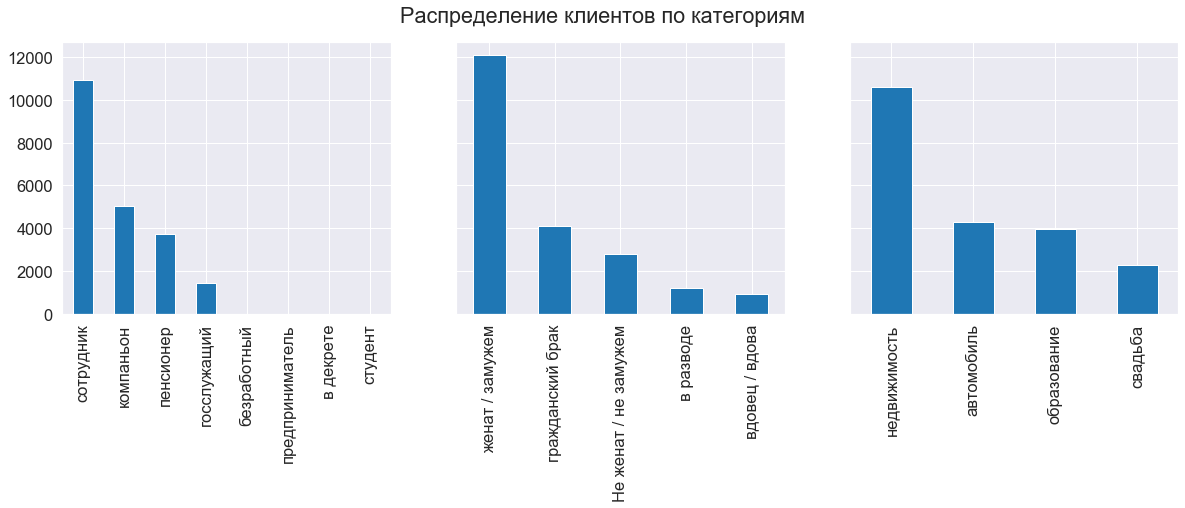

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

df['income_type'].value_counts().plot.bar(ax=ax1)
df['family_status'].value_counts().plot.bar(ax=ax2)
df['purpose_lemmas_class'].value_counts().plot.bar(ax=ax3)

fig.suptitle('Распределение клиентов по категориям')

plt.show()

Радикальных изменений на левом и среднем графике не наблюдается, предварительные качественные выводы остаются в силе. Наибольшее количество кредитов связаны с недвижимостью, второе и третье место делят автомобили и образование. Меньше всего клиентов берут кредиты на свадьбу.

**Вывод**

- Категоризация данных позволила выделить дополнительные дубликаты.
- Наибольшее количество кредитов связаны с недвижимостью.

## Шаг 3. Ответьте на вопросы

Метод: я буду сравнивать относительную долю недобросовестных кредиторов в каждой из целевых групп.

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [53]:
df.columns

Index(['index', 'children', 'days_employed', 'dob_years', 'education',
       'education_id', 'family_status', 'family_status_id', 'gender',
       'income_type', 'debt', 'total_income', 'purpose', 'days_employed_abs',
       'purpose_lemmas', 'purpose_lemmas_class'],
      dtype='object')

In [54]:
df['children'].value_counts()

0    13875
1     4751
2     2115
3      329
4       40
5        9
Name: children, dtype: int64

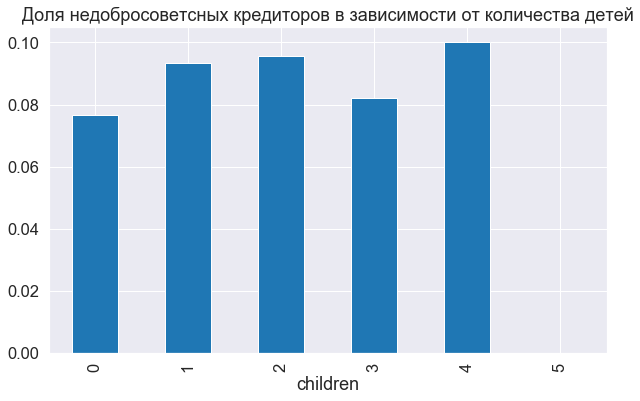

In [55]:
children_fraction = df.groupby('children')['debt'].sum() / df['children'].value_counts()

children_fraction.plot.bar()

plt.title('Доля недобросоветсных кредиторов в зависимости от количества детей')

plt.show()

**Вывод**

Кажется, что наличие детей уменьшает вероятность того, что кредитор вернет деньги банку. Сделать однозначный вывод можно будет после вычисления ошибок на полученные значения. Статистики по кредиторам с 5 детьми недостаточно: в данных таких клиентов всего 9.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Верно.

</div>

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [56]:
df['family_status'].value_counts()

женат / замужем          12075
гражданский брак          4124
Не женат / не замужем     2784
в разводе                 1193
вдовец / вдова             943
Name: family_status, dtype: int64

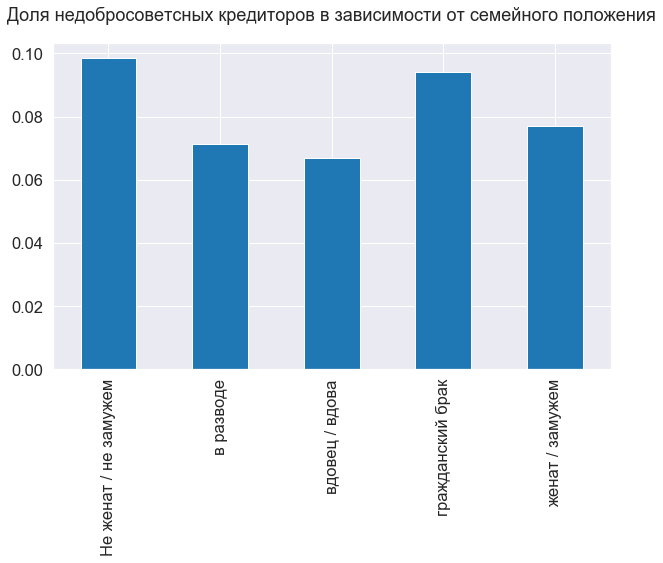

In [57]:
family_fraction = df.groupby('family_status')['debt'].sum() / df['family_status'].value_counts()

family_fraction.plot.bar()

plt.title('Доля недобросоветсных кредиторов в зависимости от семейного положения', y=1.05)

plt.show()

**Вывод**

Хуже всего возвращают кредиты не женатые (не замужние) клиенты и те, кто состоит в гражданском браке. Для более внятных выводов нужно оценивать шум в данных.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Хорошо.

</div>

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для удобства введу категории по уровню дохода

In [58]:
def income_classifier(income):
    """
    Функция для категоризации дохода клиентов.

    Args:
        income: Ежемесячный доход

    Returns:
        [str]: Категория
    """    
    if income < 50000:
        return 'низкий'
    
    elif income > 50000 and income < 150000:
        return 'средний'

    elif income > 150000 and income < 350000:
        return 'высокий'

    elif income > 350000:
        return 'очень высокий'

    else:
        return np.NaN

In [59]:
df['income_class'] = df['total_income'].apply(income_classifier)

df

/Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs,purpose_lemmas,purpose_lemmas_class,income_class
0,0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,8437.673028,"[покупка, , жилье, \n]",недвижимость,высокий
1,1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754,"[приобретение, , автомобиль, \n]",автомобиль,средний
2,2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,5623.422610,"[покупка, , жилье, \n]",недвижимость,средний
3,3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,4124.747207,"[дополнительный, , образование, \n]",образование,высокий
4,4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,NaN,"[сыграть, , свадьба, \n]",свадьба,высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21520,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4529.316663,"[операция, , с, , жилье, \n]",недвижимость,высокий
21450,21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,NaN,"[сделка, , с, , автомобиль, \n]",автомобиль,высокий
21451,21522,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,2113.346888,"[недвижимость, \n]",недвижимость,средний
21452,21523,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705,"[на, , покупка, , свой, , автомобиль, \n]",автомобиль,высокий


In [60]:
df['income_class'].value_counts()

средний          10968
высокий           8920
очень высокий      859
низкий             372
Name: income_class, dtype: int64

In [61]:
df['income_range'] = pd.qcut(df['total_income'], 4)

df

/Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_abs,purpose_lemmas,purpose_lemmas_class,income_class,income_range
0,0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,8437.673028,"[покупка, , жилье, \n]",недвижимость,высокий,"(196975.5, 2265604.0]"
1,1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,4024.803754,"[приобретение, , автомобиль, \n]",автомобиль,средний,"(106808.0, 142594.0]"
2,2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,5623.422610,"[покупка, , жилье, \n]",недвижимость,средний,"(142594.0, 196975.5]"
3,3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,4124.747207,"[дополнительный, , образование, \n]",образование,высокий,"(196975.5, 2265604.0]"
4,4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,NaN,"[сыграть, , свадьба, \n]",свадьба,высокий,"(142594.0, 196975.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,21520,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,4529.316663,"[операция, , с, , жилье, \n]",недвижимость,высокий,"(196975.5, 2265604.0]"
21450,21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,NaN,"[сделка, , с, , автомобиль, \n]",автомобиль,высокий,"(142594.0, 196975.5]"
21451,21522,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,2113.346888,"[недвижимость, \n]",недвижимость,средний,"(20666.999, 106808.0]"
21452,21523,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,3112.481705,"[на, , покупка, , свой, , автомобиль, \n]",автомобиль,высокий,"(196975.5, 2265604.0]"


<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Смотри, у тебя самая маленькая категория в 26 раз меньше самой большой. 
    
 Когда мы делим на категории количественные данные, то лучше их делать примерно одинаковыми. Для этого можно воспользоваться методом `qcut()`. Пример:
    
```py
pd.qcut(df['total_income'], 4)
```
    
```
Name: total_income, Length: 21453, dtype: category
Categories (4, interval[float64]): [(20666.999, 107620.0]  (107620.0, 142594.0]  (142594.0, 195818.0]  (195818.0, 2265604.0]]
```
                                                                                                               
Что внутри: 
    
```py
pd.qcut(датафрейм['столбец'], количество_категорий)
``` 
    
Итого у нас 4 категории:
* меньше 107_620
* от 107_620 до 142_594
* от 142_594 до 195_818
* от 195_818
    
Попробуй использовать этот метод.

</div>

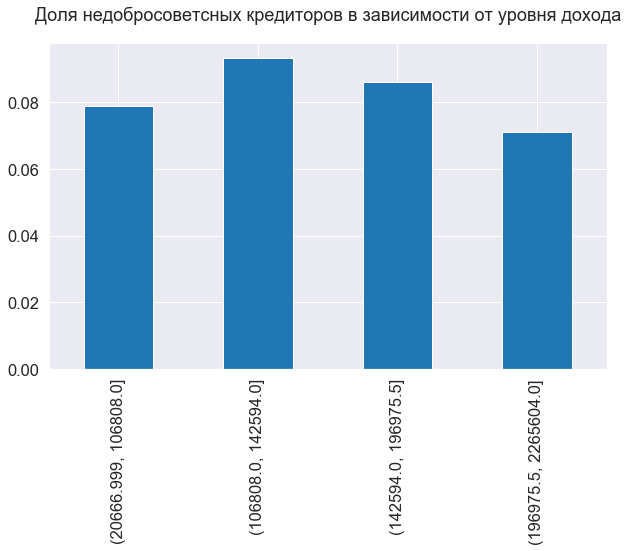

In [62]:
income_fraction_range = df.groupby('income_range')['debt'].sum() / df['income_range'].value_counts()

income_fraction_range.plot.bar()

plt.title('Доля недобросоветсных кредиторов в зависимости от уровня дохода', y=1.05)

plt.show()

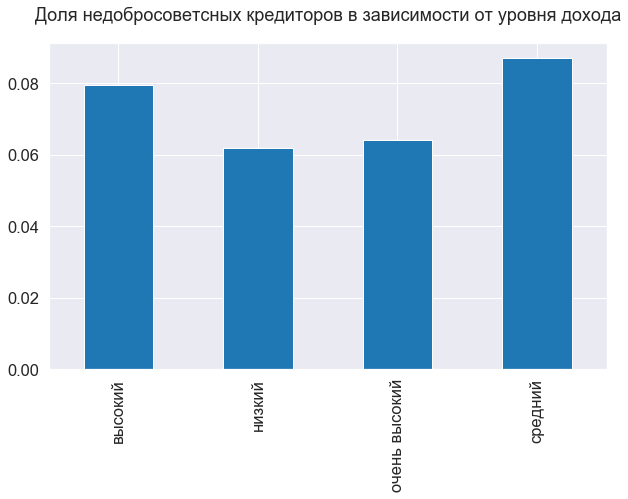

In [63]:
income_fraction = df.groupby('income_class')['debt'].sum() / df['income_class'].value_counts()

income_fraction.plot.bar()

plt.title('Доля недобросоветсных кредиторов в зависимости от уровня дохода', y=1.05)

plt.show()

**Вывод**

Хуже всего возвращают кредиты клиенты с высоким и средним уровнем дохода. Лучше справляются кредиторы с низким и очень высоким доходом.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Если разделить категории равномерно, то вывод немного изменится.

</div>

<div class="alert alert-info">

<b>Студент: </b> Да, действительно. При таком разбиении лучше остальных возвращают кредиты клиенты с ежемесячным доходом выше 200 тысяч. Интересно, почему 🤔

</div>

<div class="alert alert-success">

<b>🔁2️⃣ Ревьюер: 👍</b> Я сам удивлен. 😀

</div>

- Как разные цели кредита влияют на его возврат в срок?

In [64]:
df['purpose_lemmas_class'].value_counts()

недвижимость    10578
автомобиль       4271
образование      3964
свадьба          2306
Name: purpose_lemmas_class, dtype: int64

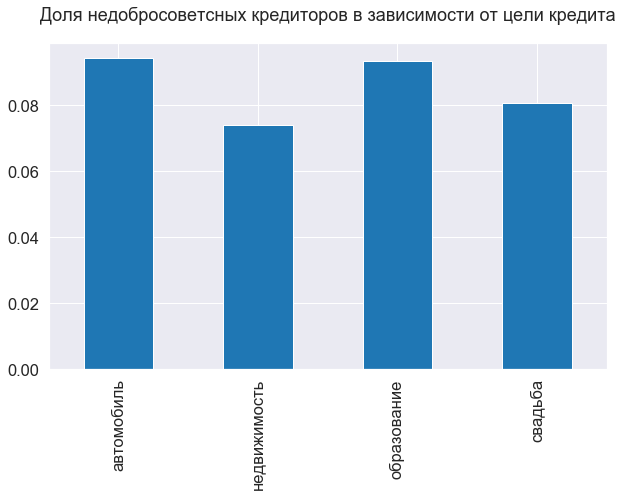

In [65]:
purpose_fraction = df.groupby('purpose_lemmas_class')['debt'].sum() / df['purpose_lemmas_class'].value_counts()

purpose_fraction.plot.bar()

plt.title('Доля недобросоветсных кредиторов в зависимости от цели кредита', y=1.05)

plt.show()

**Вывод**

Больше всего недобросовестных кредиторов среди тех, кто занимает деньги на цели связанные с автомобилем и образованием. Лучше всех справляются кредиторы, берущие кредиты на недвижимость.

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Правильно.

</div>

## Шаг 4. Общий вывод

В работе была исследованны зависимости погашения кредита в срок от разных факторов (наличие детей, семейный статус, уровень дохода, цель кредита) на основе информации о ~20 тыс. клиентов.

Исходные данные содержали пропуски и выбросы, которые были обработаны перед проведением анализа. По результатам анализа сделаны следующие выводы:

**Количество детей**

Наличие детей уменьшает вероятность того, что кредитор вернет деньги банку. Взависимости от количества детей эта вероятность варьируется в пределах от 8.2% до 9.8%. Клиенты, не имеющие детей, не возвращают кредит в срок в среднем в 7.5% случаях.

**Семейный статус**

Хуже остальных возвращают кредиты не женатые или не замужние клиенты (в 9.8% случаев) и те, кто состоит в гражданском браке (9.4%).

**Уровень дохода**

Хуже всего возвращают кредиты клиенты с ежемесячным уровнем дохода от 100 до 200 тысяч (примерно в 9% случаев). Лучше всего $-$ клиенты с доходом выше 200 тысяч (в 7.1%).


**Цель кредита**

Больше всего недобросовестных кредиторов среди тех, кто занимает деньги на цели, связанные с автомобилем и образованием (около 9.4%). Лучше всех справляются кредиторы, берущие кредиты на недвижимость (7.4%).

Для формулировки общего вывода необходимо оценить уровень шума в данных и указать ошибки на полученные метрики.

<a id="cell_100"></a>
<div class="alert alert-danger">

<b>🔁1️⃣ Ревьюер: ✋</b> Конечный заказчик будет читать финальный вывод и только его. Добавь информации о каждом вопросе исследования, разбей по пунктам, сделай красиво. Обязательно напиши точные числа, не меньше 10%, а 7.3%, чтобы было понятно, что проведено настоящее исследование и выводу можно верить.
    
</div>

<div class="alert alert-success">

<b>🔁1️⃣ Ревьюер: 👍</b> Хороший вывод. Единственное я бы убрал «зависит несущественно», учитывая [уровень долговой нагрузки населения России перед банками](https://www.rbc.ru/finances/11/08/2021/6112dc5f9a79473a5acea094?), а это 23’900’000’000’000˙₽, даже десятые доли проуента могут иметь значение.

</div>

<div class="alert alert-info">

<b>🔁2️⃣ Студент: </b> Замечание учел. Но мы не посчитали здесь доверительные интервалы на метрики и пока не можем делать значимые выводы про десятые доли процента. Поправь, если не согласен.

</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [ ]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации (_не очень понял, что здесь требуется, написа пару слов про библиотеку pymystem3_);
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- []  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.

<a id="cell_100"></a>
<div class="alert alert-danger">

<b>🔁1️⃣ Ревьюер: ✋</b> Миша, у тебя хороший проект. Здорово, что используешь визуализацию. Но ты выполнил не все разделы обязательные к исполнению. Доделывай и высылай проект.
       
Жду новую версию проекта. 🙂

    
</div>

<div class="alert alert-danger">

<b>🔁1️⃣ Ревьюер: ✋</b> Осталось заменить уровень дохода более точными значениями и проект можно принимать. Если возникнут проблемы с заполнением, подскажу как.
       
**Ошибка возникала из-за того, что ты не сбросил индексы при удалении дубликатов.**

```py
df = df.drop_duplicates().reset_index()
```

Жду новую версию проекта. 🙂

    
</div>

<div class="alert alert-info">

<b>🔁2️⃣ Студент: </b> Помогло!

</div>